## Projeto de Ciência de Dados:
- Professor: Ricardo Roberto de Lima

### 02 – Construir um novo projeto de Machine Learning com os seguintes itens:
- Escolher um Dataset com o Kaggle Dataset: https://www.kaggle.com/datasets/erdemtaha/cancer-data
- Construir um código com python que implemente um Modelo de Machine Learning de Classificação Binária, escolha o algoritimo e faça o processo de Validação e Avaliação do Modelo de Machine Learning com Acurácia, precisão, F1 Score e Matriz de Confusão.

### Desenvolvedores do Projeto:
- Lucca de Sena Barbosa
- Leonardo Lucas de Brito Silva

In [33]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

In [34]:
database = pd.read_csv("data/Cancer_Data.csv")
database

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [35]:
database.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [36]:
database = database.drop(columns=['Unnamed: 32'])
database

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [37]:
x_features = database.iloc[:, 2:33].values
y_class = database.iloc[:, 1].values

In [38]:
x_features, y_class

(array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]], shape=(569, 30)),
 array(['M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M',
        'M', 'M', 'M', 'M', 'M', 'M', 'B', 'B', 'B', 'M', 'M', 'M', 'M',
        'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'B', 'M',
        'M', 'M', 'M', 'M', 'M', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'B',
        'B', 'M', 'M', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'M',
        'M', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'M', 'B', 'M', 

### Codificando as classes com o **LabelEncoder**:

In [39]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
y_class = encoder.fit_transform(y_class)

x_features, y_class

(array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]], shape=(569, 30)),
 array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
        1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
        0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
        0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
        0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1,

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [41]:
x_train, x_test, y_train, y_test = train_test_split(x_features, y_class, test_size=0.15)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((483, 30), (483,), (86, 30), (86,))

### Treinando os modelos:
- Com o objetivo de escolher o melhor modelo para o problema de classificação binária, iremos realizar o treino em 3 modelos diferentes e no final conferir o resultado. Os modelos que serão utilizados serão:

1. **Naive Bayes;**
2. **K-Nearest Neighbors - KNN;**
3. **Random Forest Classifier;**

In [42]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

In [43]:
model_naive = GaussianNB()
model_naive.fit(x_train, y_train)
predict_naive = model_naive.predict(x_test)

In [44]:
model_random = RandomForestClassifier()
model_random.fit(x_train, y_train)
predict_random = model_random.predict(x_test)

In [45]:
model_KNN = KNeighborsClassifier()
model_KNN.fit(x_train, y_train)
predict_KNN = model_KNN.predict(x_test)

#### **Naive Bayes**

In [46]:
print(classification_report(y_test, predict_naive))
print(accuracy_score(y_test, predict_naive))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94        50
           1       0.92      0.92      0.92        36

    accuracy                           0.93        86
   macro avg       0.93      0.93      0.93        86
weighted avg       0.93      0.93      0.93        86

0.9302325581395349


<Figure size 1000x700 with 0 Axes>

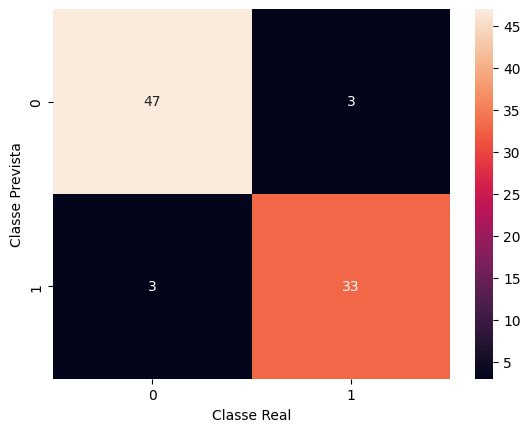

<Figure size 1000x700 with 0 Axes>

In [47]:
matrix = confusion_matrix(y_test, predict_naive)

sn.heatmap(matrix, annot=True, fmt=".0f")
plt.xlabel(xlabel="Classe Real")
plt.ylabel(ylabel="Classe Prevista")
plt.figure(figsize=(10, 7))

#### **K-Nearest Neighbors (KNN)**

In [48]:
print(classification_report(y_test, predict_KNN))
print(accuracy_score(y_test, predict_KNN))

              precision    recall  f1-score   support

           0       0.94      0.92      0.93        50
           1       0.89      0.92      0.90        36

    accuracy                           0.92        86
   macro avg       0.92      0.92      0.92        86
weighted avg       0.92      0.92      0.92        86

0.9186046511627907


<Figure size 1000x700 with 0 Axes>

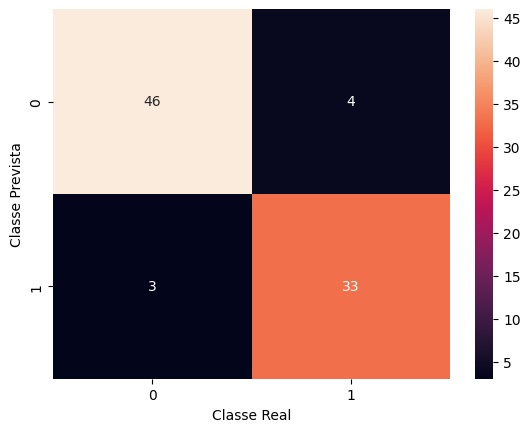

<Figure size 1000x700 with 0 Axes>

In [49]:
matrix = confusion_matrix(y_test, predict_KNN)

sn.heatmap(matrix, annot=True, fmt=".0f")
plt.xlabel(xlabel="Classe Real")
plt.ylabel(ylabel="Classe Prevista")
plt.figure(figsize=(10, 7))

#### **Random Forest Classifier**

In [50]:
print(classification_report(y_test, predict_random))
print(accuracy_score(y_test, predict_random))

              precision    recall  f1-score   support

           0       0.98      0.94      0.96        50
           1       0.92      0.97      0.95        36

    accuracy                           0.95        86
   macro avg       0.95      0.96      0.95        86
weighted avg       0.95      0.95      0.95        86

0.9534883720930233


<Figure size 1000x700 with 0 Axes>

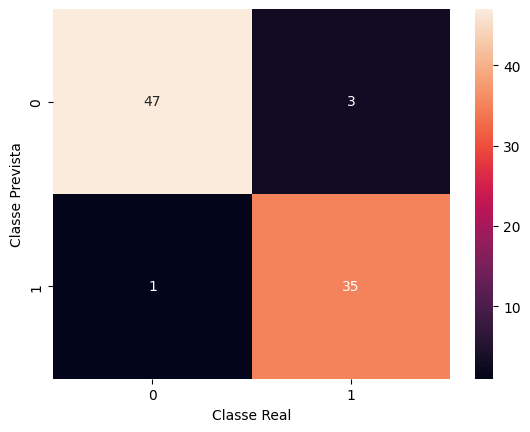

<Figure size 1000x700 with 0 Axes>

In [51]:
matrix = confusion_matrix(y_test, predict_random)

sn.heatmap(matrix, annot=True, fmt=".0f")
plt.xlabel(xlabel="Classe Real")
plt.ylabel(ylabel="Classe Prevista")
plt.figure(figsize=(10, 7))

- O modelo que apresentou um melhor desempenho foi o Random Forest Classifier apresentando uma acurácia de 95.34%

### Otimizando o melhor modelo com Grid Search: Random Forest Classifier

In [53]:
from sklearn.model_selection import GridSearchCV

In [54]:
param_grid = {'n_estimators': [10, 40, 100, 150],
              'criterion': ['gini', 'entropy'],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 5, 10]}

grid_search = GridSearchCV(param_grid=param_grid, estimator=RandomForestClassifier(), cv=5)
grid_search.fit(x_features, y_class)

melhores_parametros = grid_search.best_params_
melhores_resultados = grid_search.best_score_

display(melhores_parametros)
display(melhores_resultados)

{'criterion': 'entropy',
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'n_estimators': 40}

np.float64(0.9701443875174661)

In [58]:
model_random = RandomForestClassifier(criterion='entropy', min_samples_leaf=1, min_samples_split=10, n_estimators=40)
model_random.fit(x_train, y_train)
predict_random = model_random.predict(x_test)

<Figure size 1000x700 with 0 Axes>

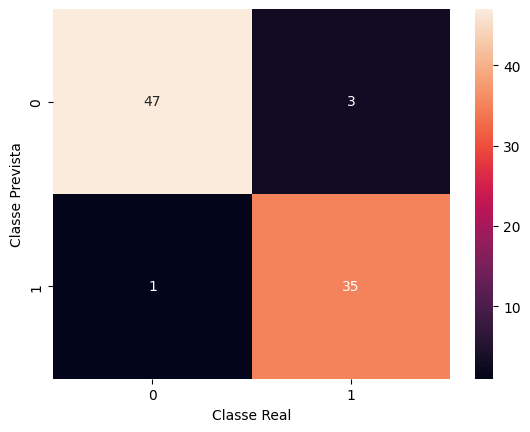

<Figure size 1000x700 with 0 Axes>

In [59]:
matrix = confusion_matrix(y_test, predict_random)

sn.heatmap(matrix, annot=True, fmt=".0f")
plt.xlabel(xlabel="Classe Real")
plt.ylabel(ylabel="Classe Prevista")
plt.figure(figsize=(10, 7))

In [60]:
print(classification_report(y_test, predict_random))
print(accuracy_score(y_test, predict_random))

              precision    recall  f1-score   support

           0       0.98      0.94      0.96        50
           1       0.92      0.97      0.95        36

    accuracy                           0.95        86
   macro avg       0.95      0.96      0.95        86
weighted avg       0.95      0.95      0.95        86

0.9534883720930233


- 1: Maligno
- 0: benigno